In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(18,12)})

In [3]:

nyc_abnb = pd.read_csv('./input/AB_NYC_2019.csv',encoding="utf-8")
nyc_sales = pd.read_csv('./input/nyc-rolling-sales.csv',encoding="utf-8")



In [4]:
nyc_abnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
nyc_abnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
nyc_abnb.drop(columns=['id','host_id','host_name','last_review','calculated_host_listings_count'])
nyc_abnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
neighbourhood_group_description = nyc_abnb[['neighbourhood_group','price','room_type']].groupby(['neighbourhood_group','room_type']).agg(['mean','count','min','max']).reset_index()
neighbourhood_group_description

neighbourhood_group        room_type       price                  
                                               mean  count min    max
0                Bronx  Entire home/apt  127.506596    379  28   1000
1                Bronx     Private room   66.788344    652   0   2500
2                Bronx      Shared room   59.800000     60  20    800
3             Brooklyn  Entire home/apt  178.327545   9559   0  10000
4             Brooklyn     Private room   76.500099  10132   0   7500
5             Brooklyn      Shared room   50.527845    413   0    725
6            Manhattan  Entire home/apt  249.239109  13199   0  10000
7            Manhattan     Private room  116.776622   7982  10   9999
8            Manhattan      Shared room   88.977083    480  10   1000
9               Queens  Entire home/apt  147.050573   2096  10   2600
10              Queens     Private room   71.762456   3372  10  10000
11              Queens      Shared room   69.020202    198  11   1800
12       Staten Island  Entire home/apt  173.846591    176  48   5000
13       Staten Island     Private room   62.292553    188  20    300
14       Staten Island      Shared room   57.444444      9  13    150

In [8]:

price_desc = neighbourhood_group_description['price']
room_types = nyc_abnb['room_type'].unique()
# price_desc

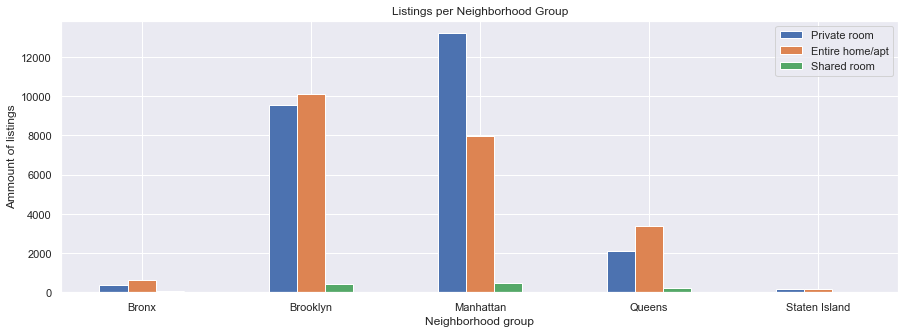

In [11]:
x_labels = neighbourhood_group_description['neighbourhood_group']
y = price_desc['count']
x = np.arange(len(x_labels)) 

plt.figure(figsize=(15,5))
width = 0.5  
for i,room_type in enumerate(room_types):
    rects1 = plt.bar(x[0::3]+i*width - width, y[i::3], width, label=room_type)

plt.xticks(x[0::3] , x_labels[0::3])
plt.legend()

plt.ylabel("Ammount of listings")
plt.xlabel("Neighborhood group")
plt.title("Listings per Neighborhood Group")

plt.savefig('listings_per_neighbourhood.pdf')

plt.show()



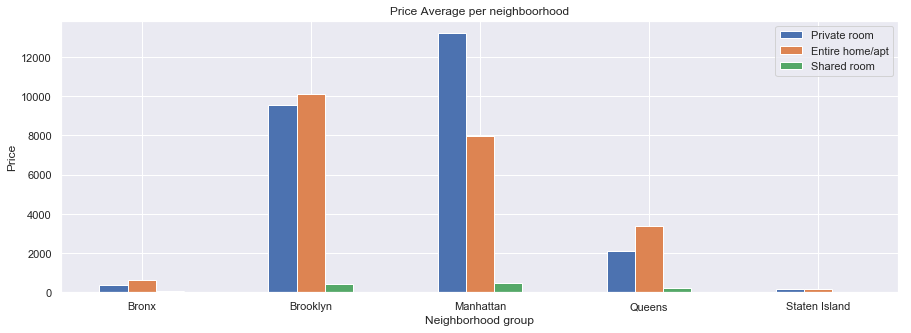

In [10]:


x_labels = neighbourhood_group_description['neighbourhood_group']
y = price_desc['count']
x = np.arange(len(x_labels)) 

plt.figure(figsize=(15,5))
width = 0.5  # the width of the bars
for i,room_type in enumerate(room_types):
    rects1 = plt.bar(x[0::3]+i*width - width , y[i::3], width, label=room_type)

plt.xticks(x[0::3] , x_labels[0::3])
plt.legend()

plt.ylabel("Price")
plt.xlabel("Neighborhood group")
plt.title("Price Average per neighboorhood")
plt.savefig('price_per_neighbourhood.pdf')


plt.show()




In [16]:
nh_description = nyc_abnb[['neighbourhood_group','neighbourhood','price','room_type']].groupby(['neighbourhood_group','room_type','neighbourhood']).agg(['mean','count','min','max']).reset_index()
nh_description

neighbourhood_group        room_type  neighbourhood       price        \
                                                               mean count   
0                 Bronx  Entire home/apt       Allerton  123.062500    16   
1                 Bronx  Entire home/apt     Baychester   90.333333     3   
2                 Bronx  Entire home/apt        Belmont  228.666667     3   
3                 Bronx  Entire home/apt      Bronxdale   77.500000     8   
4                 Bronx  Entire home/apt    Castle Hill   93.500000     4   
..                  ...              ...            ...         ...   ...   
535       Staten Island     Private room    Westerleigh   40.000000     1   
536       Staten Island      Shared room        Clifton   98.750000     4   
537       Staten Island      Shared room        Concord   29.666667     3   
538       Staten Island      Shared room  Randall Manor   13.000000     1   
539       Staten Island      Shared room    South Beach   20.000000     1   

               
     min  max  
0     49  450  
1     75  101  
2    140  299  
3     60  100  
4     62  128  
..   ...  ...  
535   40   40  
536   75  150  
537   29   30  
538   13   13  
539   20   20  

[540 rows x 7 columns]

In [17]:
manhattan_apt = nh_description[(nh_description['neighbourhood_group']=="Manhattan") & (nh_description['room_type']=="Entire home/apt") ][['neighbourhood','price']]


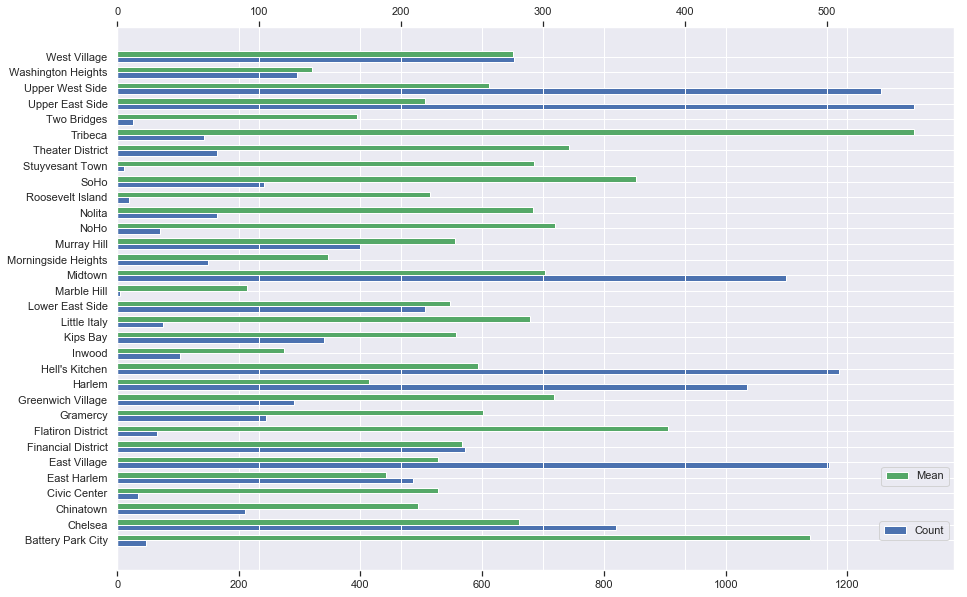

In [18]:

fig, ax1 = plt.subplots(figsize=(15,10))
y_labels = manhattan_apt['neighbourhood']
y = np.arange(len(y_labels)) 

width = 0.35

rects1 = ax1.barh(y - width/2 , manhattan_apt['price']['count'],width, label="Count")


ax1.set_yticks(y)
ax1.set_yticklabels(y_labels)
ax2 = ax1.twiny() 
rects2 = ax2.barh(y + width/2 , manhattan_apt['price']['mean'], width,label="Mean",color='g')
ax1.legend( bbox_to_anchor=(1,0.1))
ax2.legend( bbox_to_anchor=(1,0.2))

plt.savefig('listings_against_price.pdf')



In [41]:
neighbourhoods = nyc_abnb.neighbourhood.unique()


In [42]:
checkPValue = lambda p,threshold=0.05: "--> Null(H0) hypotesis rejected" if p < threshold else "--> We cannot reject the null hypotesis"
from scipy.stats import t,ttest_1samp

def get_pvalue(item):

    neighbourhood_group_mean = neighbourhood_group_description[(neighbourhood_group_description['neighbourhood_group']==item.neighbourhood_group[0])
                                             & (neighbourhood_group_description['room_type']=="Entire home/apt")]['price']['mean']
    
   
    sample =  nyc_abnb[(nyc_abnb['neighbourhood']==item.neighbourhood[0]) 
             & (nyc_abnb['room_type']=="Entire home/apt") ]
    
    f,pval = ttest_1samp(sample['price'] ,neighbourhood_group_mean)

    return pval[0]

In [43]:
entire_apt = nh_description[nh_description['room_type']=="Entire home/apt"]

In [44]:

entire_apt['nh_group p_value'] = entire_apt.apply(get_pvalue,axis='columns')



In [45]:
relevant_apt = entire_apt[entire_apt['nh_group p_value']>0.5]
relevant_apt.head()

neighbourhood_group        room_type      neighbourhood       price        \
                                                                  mean count   
0                Bronx  Entire home/apt           Allerton  123.062500    16   
6                Bronx  Entire home/apt  Claremont Village  130.500000     8   
10               Bronx  Entire home/apt    East Morrisania  126.666667     3   
14               Bronx  Entire home/apt            Fordham  121.615385    13   
17               Bronx  Entire home/apt        Kingsbridge  128.611111    18   

            nh_group p_value  
   min  max                   
0   49  450         0.861029  
6   57  390         0.940831  
10  60  200         0.985356  
14  65  223         0.689660  
17  47  399         0.951942

In [46]:
nyc_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [47]:
nyc_sales['SALE PRICE'] = pd.to_numeric(nyc_sales['SALE PRICE'], errors='coerce')
nyc_sales['GROSS SQUARE FEET'] = pd.to_numeric(nyc_sales['GROSS SQUARE FEET'], errors='coerce')
nyc_sales['LAND SQUARE FEET'] = pd.to_numeric(nyc_sales['LAND SQUARE FEET'], errors='coerce')


In [48]:
def get_gsf(col):
    try:
        return col['SALE PRICE']/col['GROSS SQUARE FEET']
    except :
        return None
def get_lsf(col):
    try:
        return col['SALE PRICE']/col['LAND SQUARE FEET']
    except :
        return None

In [49]:

nyc_sales['GSF price'] =nyc_sales.apply(get_gsf ,axis='columns')
nyc_sales['LSF price'] =nyc_sales.apply(get_lsf ,axis='columns')

In [50]:

gsf_describe = nyc_sales.groupby('NEIGHBORHOOD')['GSF price'].agg(['mean','max','min']).reset_index().rename(columns={"NEIGHBORHOOD":"neighbourhood","mean": "Sale mean", "max": "Sale max",'min':'Sale min'})
gsf_describe

,neighbourhood,Sale mean,Sale max,Sale min
0,AIRPORT LA GUARDIA,350.571592,647.058824,0.008170
1,ALPHABET CITY,989.025897,1733.477790,579.374742
2,ANNADALE,311.697487,784.449468,0.002441
3,ARDEN HEIGHTS,268.026246,773.097826,0.073855
4,ARROCHAR,329.320153,667.040359,77.075099
...,...,...,...,...
249,WOODHAVEN,321.157937,545.366795,0.004386
250,WOODLAWN,168.462128,400.579151,0.000000
251,WOODROW,289.567092,535.714286,0.002209
252,WOODSIDE,420.717017,1053.639847,0.000534


In [51]:
lsf_describe = nyc_sales.groupby('NEIGHBORHOOD')['LSF price'].agg(['mean','max','min']).reset_index().rename(columns={  "NEIGHBORHOOD":"neighbourhood", "mean": "Sale mean", "max": "Sale max",'min':'Sale min'})
lsf_describe['neighbourhood'] =lsf_describe['neighbourhood'].map(lambda x:x.lower())
relevant_apt['neighbourhood'] = relevant_apt['neighbourhood'].map(lambda x:x.lower())
inner_join = pd.merge(lsf_describe,relevant_apt, on='neighbourhood')

# pd.cut(inner_join['Sale mean'],10)
sorted_join = inner_join.sort_values('Sale mean')

size = 15
sorted_join = sorted_join[sorted_join['Sale mean'] < 4000]
sorted_join['sale price']  = pd.cut(sorted_join['Sale mean'],bins=size,labels=["$"*(i+1) for i in range(1,size + 1) ])


In [52]:
sorted_join.sort_values("sale price")

,neighbourhood,Sale mean,Sale max,Sale min,"(neighbourhood_group, )","(room_type, )","(price, mean)","(price, count)","(price, min)","(price, max)","(nh_group p_value, )",sale price
19,pelham bay,0.000029,0.000029,2.941176e-05,Bronx,Entire home/apt,115.916667,12,37,299,0.580478,$$
14,grymes hill,73.416798,387.263339,2.000000e-03,Staten Island,Entire home/apt,170.833333,6,110,300,0.923143,$$$
29,todt hill,87.073095,201.149425,4.697264e-07,Staten Island,Entire home/apt,208.666667,3,62,429,0.785592,$$$
20,pelham gardens,114.973350,304.458400,0.000000e+00,Bronx,Entire home/apt,112.294118,17,40,450,0.516809,$$$
28,throgs neck,118.667890,330.047150,0.000000e+00,Bronx,Entire home/apt,121.545455,11,74,325,0.792645,$$$
5,cambria heights,119.173307,366.132723,2.500000e-04,Queens,Entire home/apt,147.000000,4,79,180,0.998386,$$$
31,wakefield,120.810652,768.750000,0.000000e+00,Bronx,Entire home/apt,139.388889,18,28,309,0.598107,$$$
27,stapleton,122.442310,733.333333,1.600000e-03,Staten Island,Entire home/apt,160.900000,10,70,450,0.738506,$$$
21,port richmond,124.508288,1858.335578,1.055743e-03,Staten Island,Entire home/apt,173.666667,3,50,250,0.997961,$$$
10,flatlands,127.784535,516.528926,0.000000e+00,Brooklyn,Entire home/apt,194.486486,37,65,1700,0.725893,$$$


AttributeError: 'NoneType' object has no attribute 'update'

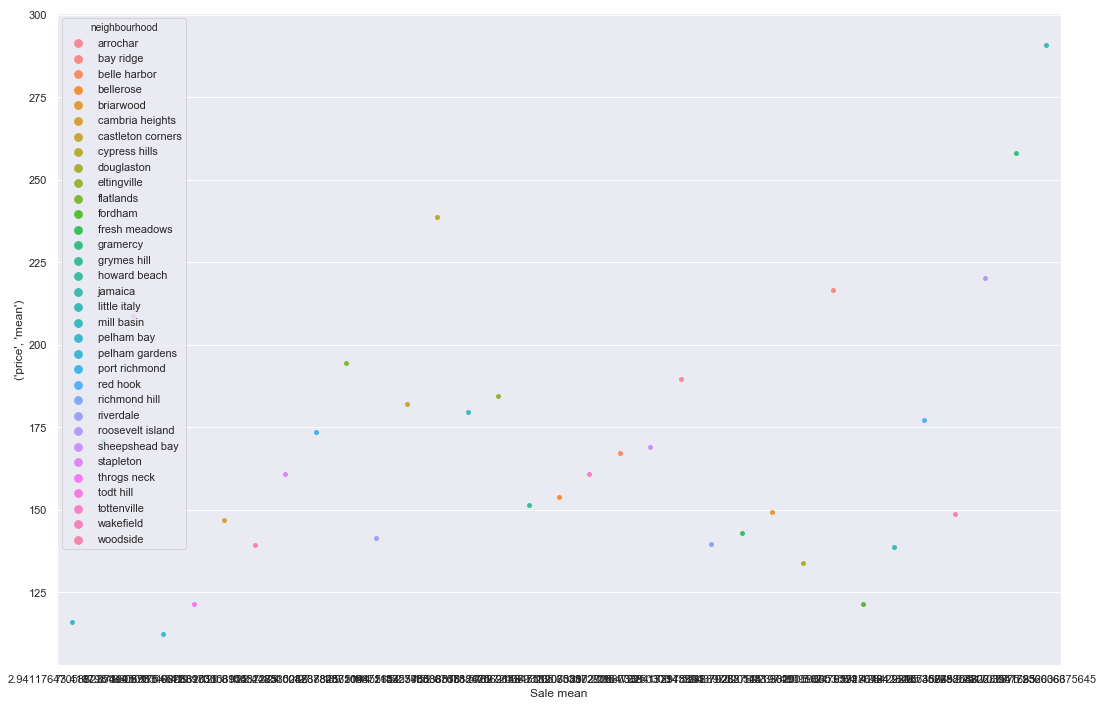

In [55]:
p = sns.swarmplot(x="Sale mean", y=('price', 'mean'), hue="neighbourhood",
            data=inner_join);
p.set_yticks( ['$', '$$', '$$$', '$$$$' ])
p.xticks()

